### Author:

    HOANG MINH KHIEM - 16520588
    TRAN ANH TUAN - 165201386

### Overview: 
In this assignment, you will need to apply data analytics, using the tools introduced during the labs. You are required to study the SEEK job market data and analyze. The assignment consists of 3 parts. In the first part, you will need to understand data characteristics using data preparation and preprocessing techniques. In the second part, you will perform various data analysis techniques, including exploratory, statistical, and predictive ones. In the third part, you will need to evaluate your findings and determine appropriate future actions.

# Part 1 - Data Preparation and Preprocessing

    ● The primary dataset that we would like to use is the job market dataset which is provided in CSV format (data.csv).
    ● Perform data preparation and preprocessing for your analysis.
    ● Submit your Jupyter notebook in your Github repository

In [30]:
import pandas as pd
import numpy as np

In [31]:
df = pd.read_csv('data.csv')
df.head(10)

D:\Apps\Ananconda3.7\Anaconda3.7\lib\site-packages\IPython\core\interactiveshell.py:2728: DtypeWarning: Columns (0,4,5,6,7) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,Id,Title,Company,Date,Location,Area,Classification,SubClassification,Requirement,FullDescription,LowestSalary,HighestSalary,JobType
0,37404348,Casual Stock Replenisher,Aldi Stores,2018-10-07T00:00:00.000Z,Sydney,North West & Hills District,Retail & Consumer Products,Retail Assistants,Our Casual Stock Replenishers pride themselves...,NaN,0,30,NaN
1,37404337,Casual Stock Replenisher,Aldi Stores,2018-10-07T00:00:00.000Z,Richmond & Hawkesbury,NaN,Retail & Consumer Products,Retail Assistants,Our Casual Stock Replenishers pride themselves...,NaN,0,30,NaN
2,37404356,RETAIL SALES SUPERSTARS and STYLISTS Wanted - ...,LB Creative Pty Ltd,2018-10-07T00:00:00.000Z,Brisbane,CBD & Inner Suburbs,Retail & Consumer Products,Retail Assistants,BRAND NEW FLAGSHIP STORE OPENING - SUNSHINE PLAZA,NaN,0,30,NaN
3,37404330,Team member - Belrose,Anaconda Group Pty Ltd,2018-10-07T00:00:00.000Z,Gosford & Central Coast,NaN,Retail & Consumer Products,Retail Assistants,Bring it on - do you love the great outdoors a...,NaN,0,30,NaN
4,37404308,"Business Banking Contact Centre Specialist, Ni...",Commonwealth Bank - Business & Private Banking,2018-10-07T00:00:00.000Z,Sydney,Ryde & Macquarie Park,Call Centre & Customer Service,Sales - Inbound,"We are seeking highly articulate, enthusiastic...",NaN,0,30,NaN
5,37404307,"Business Banking Contact Centre Specialist, Ni...",Commonwealth Bank - Business & Private Banking,2018-10-07T00:00:00.000Z,Sydney,Ryde & Macquarie Park,Call Centre & Customer Service,Customer Service - Call Centre,"We are seeking highly articulate, enthusiastic...",NaN,0,30,NaN
6,37404355,Casual Café All-rounder in Semaphore,Jora Local,2018-10-07T00:00:00.000Z,Adelaide,NaN,Hospitality & Tourism,Waiting Staff,A cafe/restaurant in Semaphore is seeking a ca...,NaN,0,30,NaN
7,37404350,Casual Café All-rounder in Woolloongabba,Jora Local,2018-10-07T00:00:00.000Z,Brisbane,CBD & Inner Suburbs,Hospitality & Tourism,Waiting Staff,A cafe in Woolloongabba is seeking a casual Ca...,NaN,0,30,NaN
8,37404301,Telemarketer,Reventon Investments,2018-10-07T00:00:00.000Z,Melbourne,CBD & Inner Suburbs,Call Centre & Customer Service,Sales - Outbound,Market leading investment & financial services...,NaN,0,30,NaN
9,37404286,Casual Dish Hand in Brighton,Jora Local,2018-10-07T00:00:00.000Z,Melbourne,Bayside & South Eastern Suburbs,Hospitality & Tourism,Kitchen & Sandwich Hands,A restaurant in Brighton is seeking a casual D...,NaN,0,30,NaN


### 1) Describe the dataset.
● Describe the steps you used for data preparation and preprocessing

In [32]:
df.columns

Index(['Id', 'Title', 'Company', 'Date', 'Location', 'Area', 'Classification',
       'SubClassification', 'Requirement', 'FullDescription', 'LowestSalary',
       'HighestSalary', 'JobType'],
      dtype='object')

● Dataset size of each variation:

In [33]:
df.info(0)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 318477 entries, 0 to 318476
Data columns (total 13 columns):
Id                   318477 non-null object
Title                318477 non-null object
Company              306473 non-null object
Date                 318477 non-null object
Location             197229 non-null object
Area                 122658 non-null object
Classification       197229 non-null object
SubClassification    197229 non-null object
Requirement          318470 non-null object
FullDescription      302302 non-null object
LowestSalary         318477 non-null int64
HighestSalary        318477 non-null int64
JobType              302379 non-null object
dtypes: int64(2), object(11)
memory usage: 31.6+ MB


● Dataset structure/format:

In [34]:
df.dtypes

Id                   object
Title                object
Company              object
Date                 object
Location             object
Area                 object
Classification       object
SubClassification    object
Requirement          object
FullDescription      object
LowestSalary          int64
HighestSalary         int64
JobType              object
dtype: object

● Attributes/features of review data that I'm going to use (Classification, SubClassification):

In [35]:
df['Classification'].describe()

count                                     197229
unique                                        30
top       Information & Communication Technology
freq                                       22796
Name: Classification, dtype: object

In [36]:
df['SubClassification'].describe()

count     197229
unique       338
top        Other
freq       11349
Name: SubClassification, dtype: object

● Attributes/features of product data that I'm going to use (LowestSalary, HighestSalary):

In [37]:
df['LowestSalary'].describe()

count    318477.000000
mean         65.813544
std          51.063125
min           0.000000
25%          30.000000
50%          60.000000
75%         100.000000
max         200.000000
Name: LowestSalary, dtype: float64

In [38]:
df['HighestSalary'].describe()

count    318477.000000
mean        114.432342
std         177.594941
min          30.000000
25%          40.000000
50%          70.000000
75%         120.000000
max         999.000000
Name: HighestSalary, dtype: float64

● Which parts of the dataset will you use or all of them?
    - In this assigment, we will use all the given columns except "Id", 


### 2) Describe the steps you used for data preparation and preprocessing.

● How do you load the data using Pandas?
    - First, I import pandas.
    - Then, I use "df = pd.read_csv('data.cv') command to load the csv file to the Data frame.
    - To obsever the data, I use "df.head()" to display top data.
    
    
● How do you normalize the data?
    - I will use Min-Max normalization to normalize 3 columns (Id, LowestSalary, HighestSalary).

In [39]:
new_df = df.copy()

# Min-Max normalization for Lowest Salary:
new_df['LowestSalary'] = new_df['LowestSalary'] / new_df['LowestSalary'].max() 

# Min-Max normalization for Highest Salary:
new_df['HighestSalary'] = new_df['HighestSalary'] / new_df['HighestSalary'].max()

new_df.head()

,Id,Title,Company,Date,Location,Area,Classification,SubClassification,Requirement,FullDescription,LowestSalary,HighestSalary,JobType
0,37404348,Casual Stock Replenisher,Aldi Stores,2018-10-07T00:00:00.000Z,Sydney,North West & Hills District,Retail & Consumer Products,Retail Assistants,Our Casual Stock Replenishers pride themselves...,NaN,0.0,0.03003,NaN
1,37404337,Casual Stock Replenisher,Aldi Stores,2018-10-07T00:00:00.000Z,Richmond & Hawkesbury,NaN,Retail & Consumer Products,Retail Assistants,Our Casual Stock Replenishers pride themselves...,NaN,0.0,0.03003,NaN
2,37404356,RETAIL SALES SUPERSTARS and STYLISTS Wanted - ...,LB Creative Pty Ltd,2018-10-07T00:00:00.000Z,Brisbane,CBD & Inner Suburbs,Retail & Consumer Products,Retail Assistants,BRAND NEW FLAGSHIP STORE OPENING - SUNSHINE PLAZA,NaN,0.0,0.03003,NaN
3,37404330,Team member - Belrose,Anaconda Group Pty Ltd,2018-10-07T00:00:00.000Z,Gosford & Central Coast,NaN,Retail & Consumer Products,Retail Assistants,Bring it on - do you love the great outdoors a...,NaN,0.0,0.03003,NaN
4,37404308,"Business Banking Contact Centre Specialist, Ni...",Commonwealth Bank - Business & Private Banking,2018-10-07T00:00:00.000Z,Sydney,Ryde & Macquarie Park,Call Centre & Customer Service,Sales - Inbound,"We are seeking highly articulate, enthusiastic...",NaN,0.0,0.03003,NaN


● How do you clean the data?
    - First, I will drop the unecessary columns, in this case are Id, Requirement, FullDescription.

In [40]:
new_df = new_df.drop(['Id', 'Requirement', 'FullDescription'], axis =1)

new_df.head()

,Title,Company,Date,Location,Area,Classification,SubClassification,LowestSalary,HighestSalary,JobType
0,Casual Stock Replenisher,Aldi Stores,2018-10-07T00:00:00.000Z,Sydney,North West & Hills District,Retail & Consumer Products,Retail Assistants,0.0,0.03003,NaN
1,Casual Stock Replenisher,Aldi Stores,2018-10-07T00:00:00.000Z,Richmond & Hawkesbury,NaN,Retail & Consumer Products,Retail Assistants,0.0,0.03003,NaN
2,RETAIL SALES SUPERSTARS and STYLISTS Wanted - ...,LB Creative Pty Ltd,2018-10-07T00:00:00.000Z,Brisbane,CBD & Inner Suburbs,Retail & Consumer Products,Retail Assistants,0.0,0.03003,NaN
3,Team member - Belrose,Anaconda Group Pty Ltd,2018-10-07T00:00:00.000Z,Gosford & Central Coast,NaN,Retail & Consumer Products,Retail Assistants,0.0,0.03003,NaN
4,"Business Banking Contact Centre Specialist, Ni...",Commonwealth Bank - Business & Private Banking,2018-10-07T00:00:00.000Z,Sydney,Ryde & Macquarie Park,Call Centre & Customer Service,Sales - Inbound,0.0,0.03003,NaN


    - Then, I will replace "JobType" missing value by "No detail" value:

In [41]:
new_df['JobType'] = new_df['JobType'].fillna('No Detail')

new_df.head()

,Title,Company,Date,Location,Area,Classification,SubClassification,LowestSalary,HighestSalary,JobType
0,Casual Stock Replenisher,Aldi Stores,2018-10-07T00:00:00.000Z,Sydney,North West & Hills District,Retail & Consumer Products,Retail Assistants,0.0,0.03003,No Detail
1,Casual Stock Replenisher,Aldi Stores,2018-10-07T00:00:00.000Z,Richmond & Hawkesbury,NaN,Retail & Consumer Products,Retail Assistants,0.0,0.03003,No Detail
2,RETAIL SALES SUPERSTARS and STYLISTS Wanted - ...,LB Creative Pty Ltd,2018-10-07T00:00:00.000Z,Brisbane,CBD & Inner Suburbs,Retail & Consumer Products,Retail Assistants,0.0,0.03003,No Detail
3,Team member - Belrose,Anaconda Group Pty Ltd,2018-10-07T00:00:00.000Z,Gosford & Central Coast,NaN,Retail & Consumer Products,Retail Assistants,0.0,0.03003,No Detail
4,"Business Banking Contact Centre Specialist, Ni...",Commonwealth Bank - Business & Private Banking,2018-10-07T00:00:00.000Z,Sydney,Ryde & Macquarie Park,Call Centre & Customer Service,Sales - Inbound,0.0,0.03003,No Detail


    - Lastly, for the rest missing values, we just remove the entire row:

In [42]:
new_df.dropna()

,Title,Company,Date,Location,Area,Classification,SubClassification,LowestSalary,HighestSalary,JobType
0,Casual Stock Replenisher,Aldi Stores,2018-10-07T00:00:00.000Z,Sydney,North West & Hills District,Retail & Consumer Products,Retail Assistants,0.0,0.03003,No Detail
2,RETAIL SALES SUPERSTARS and STYLISTS Wanted - ...,LB Creative Pty Ltd,2018-10-07T00:00:00.000Z,Brisbane,CBD & Inner Suburbs,Retail & Consumer Products,Retail Assistants,0.0,0.03003,No Detail
4,"Business Banking Contact Centre Specialist, Ni...",Commonwealth Bank - Business & Private Banking,2018-10-07T00:00:00.000Z,Sydney,Ryde & Macquarie Park,Call Centre & Customer Service,Sales - Inbound,0.0,0.03003,No Detail
5,"Business Banking Contact Centre Specialist, Ni...",Commonwealth Bank - Business & Private Banking,2018-10-07T00:00:00.000Z,Sydney,Ryde & Macquarie Park,Call Centre & Customer Service,Customer Service - Call Centre,0.0,0.03003,No Detail
7,Casual Café All-rounder in Woolloongabba,Jora Local,2018-10-07T00:00:00.000Z,Brisbane,CBD & Inner Suburbs,Hospitality & Tourism,Waiting Staff,0.0,0.03003,No Detail
8,Telemarketer,Reventon Investments,2018-10-07T00:00:00.000Z,Melbourne,CBD & Inner Suburbs,Call Centre & Customer Service,Sales - Outbound,0.0,0.03003,No Detail
9,Casual Dish Hand in Brighton,Jora Local,2018-10-07T00:00:00.000Z,Melbourne,Bayside & South Eastern Suburbs,Hospitality & Tourism,Kitchen & Sandwich Hands,0.0,0.03003,No Detail
14,Casual Cleaner in Kew,Jora Local,2018-10-07T00:00:00.000Z,Melbourne,Eastern Suburbs,Hospitality & Tourism,Housekeeping,0.0,0.03003,No Detail
17,Maintenance Assistant Part-Time,Costco Wholesale,2018-10-07T00:00:00.000Z,Melbourne,Eastern Suburbs,Retail & Consumer Products,Other,0.0,0.03003,No Detail
18,Telstra Retail Sales & Service Consultant - Ca...,TLS Airport West,2018-10-07T00:00:00.000Z,Melbourne,Western Suburbs,Retail & Consumer Products,Retail Assistants,0.0,0.03003,No Detail


### 3) What is your hypothesis (expectation) about the analysis outcome?

# Part 2 - Data Analysis and Interpretation:
    ● Perform exploratory data analysis 
    ● Perform statistical data analysis 
    ● Perform predictive data analysis  
    ● Submit your Jupyter notebook in your Github repository

### 1) Study the job metadata. Extract the relevant information to describe the job’s attributes.

    ○ What is the sector, sub-sector of each job?
    - Sector of each job in the DataFrame displayed in Classification column.
    - Sub-sector of each job in the DataFrame displayed in SubClassification column.

In [43]:
sector = new_df[['Classification', 'SubClassification']]
sector = sector.dropna()

sector.head()

,Classification,SubClassification
0,Retail & Consumer Products,Retail Assistants
1,Retail & Consumer Products,Retail Assistants
2,Retail & Consumer Products,Retail Assistants
3,Retail & Consumer Products,Retail Assistants
4,Call Centre & Customer Service,Sales - Inbound


In [44]:
sector.describe()

,Classification,SubClassification
count,197229,197229
unique,30,338
top,Information & Communication Technology,Other
freq,22796,11349


In [45]:
# Show the total sub-sector inside sector by pivot table
table = pd.pivot_table(sector, columns=['SubClassification'] ,index=['Classification'], aggfunc={'SubClassification':'count'}, fill_value=0)

table.head()

SubClassification  \
SubClassification               Account & Relationship Management   
Classification                                                      
Accounting                                                      0   
Administration & Office Support                                 0   
Advertising, Arts & Media                                       0   
Banking & Financial Services                                  236   
CEO & General Management                                        0   

                                                                           \
SubClassification               Accounts Officers/Clerks Accounts Payable   
Classification                                                              
Accounting                                           929              531   
Administration & Office Support                        0                0   
Advertising, Arts & Media                              0                0   
Banking & Financial Services                           0                0   
CEO & General Management                               0                0   

                                                                              \
SubClassification               Accounts Receivable/Credit Control Actuarial   
Classification                                                                 
Accounting                                                     612         0   
Administration & Office Support                                  0         0   
Advertising, Arts & Media                                        0         0   
Banking & Financial Services                                     0         0   
CEO & General Management                                         0         0   

                                                                          \
SubClassification               Administration Administrative Assistants   
Classification                                                             
Accounting                                   0                         0   
Administration & Office Support              0                      4572   
Advertising, Arts & Media                    0                         0   
Banking & Financial Services                 0                         0   
CEO & General Management                     0                         0   

                                                       \
SubClassification               Aerospace Engineering   
Classification                                          
Accounting                                          0   
Administration & Office Support                     0   
Advertising, Arts & Media                           0   
Banking & Financial Services                        0   
CEO & General Management                            0   

                                                           \
SubClassification               Aged & Disability Support   
Classification                                              
Accounting                                              0   
Administration & Office Support                         0   
Advertising, Arts & Media                               0   
Banking & Financial Services                            0   
CEO & General Management                                0   

                                                           \
SubClassification               Agency Account Management   
Classification                                              
Accounting                                              0   
Administration & Office Support                         0   
Advertising, Arts & Media                             147   
Banking & Financial Services                            0   
CEO & General Management                                0   

                                              ...                \
SubClassification                             ...                 
Classification                                ...          

    ○ Where is the location of the job?

In [46]:
location = df[['Location', 'Classification']]
location = location.dropna()

location.head()

,Location,Classification
0,Sydney,Retail & Consumer Products
1,Richmond & Hawkesbury,Retail & Consumer Products
2,Brisbane,Retail & Consumer Products
3,Gosford & Central Coast,Retail & Consumer Products
4,Sydney,Call Centre & Customer Service


In [47]:
location.describe()

,Location,Classification
count,197229,197229
unique,65,30
top,Sydney,Information & Communication Technology
freq,60765,22796


In [48]:
# Show the total job available in each location
table = pd.pivot_table(location, columns=['Classification'] ,index=['Location'], aggfunc={'Classification':'count'}, fill_value=0)

table

Classification  \
Classification                           Accounting   
Location                                              
ACT                                             180   
Adelaide                                        269   
Adelaide Hills & Barossa                          6   
Albany & Great Southern                           4   
Albury Area                                      11   
Alice Springs & Central Australia                 3   
Bairnsdale & Gippsland                            5   
Ballarat & Central Highlands                     12   
Bendigo, Goldfields & Macedon Ranges             12   
Blue Mountains & Central West                    25   
Brisbane                                       1064   
Broome & Kimberley                                5   
Bunbury & South West                              3   
Bundaberg & Wide Bay Burnett                      7   
Cairns & Far North                               33   
Central & South East TAS                          2   
Coffs Harbour & North Coast                       6   
Coober Pedy & Outback SA                          0   
Darwin                                           26   
Devonport & North West                           10   
Dubbo & Central NSW                              19   
Far West & North Central NSW                      1   
Fleurieu Peninsula & Kangaroo Island              0   
Geraldton, Gascoyne & Midwest                     1   
Gladstone & Central QLD                          10   
Gold Coast                                      124   
Gosford & Central Coast                          51   
Hervey Bay & Fraser Coast                         4   
Hobart                                           46   
Horsham & Grampians                               2   
...                                             ...   
Mandurah & Peel                                   3   
Melbourne                                      2341   
Mildura & Murray                                 10   
Mornington Peninsula & Bass Coast                 9   
Mt Gambier & Limestone Coast                      4   
Newcastle, Maitland & Hunter                    133   
Northam & Wheatbelt                               0   
Northern QLD                                     23   
Perth                                           592   
Port Hedland, Karratha & Pilbara                  3   
Port Macquarie & Mid North Coast                  4   
Richmond & Hawkesbury                             3   
Riverland & Murray Mallee                         1   
Rockhampton & Capricorn Coast                     9   
Shepparton & Goulburn Valley                      7   
Somerset & Lockyer                                0   
South West Coast VIC                             43   
Southern Highlands & Tablelands                  14   
Sunshine Coast                                   29   
Sydney                                         4010   
Tamworth & North West NSW                        15   
Toowoomba & Darling Downs                        35   
Tumut, Snowy & Monaro                             1   
Wagga Wagga & Riverina                           18   
West Gippsland & Latrobe Valley                   2   
Western QLD                                      10   
Whyalla & Eyre Peninsula                          2   
Wollongong, Illawarra & South Coast              41   
Yarra Valley & High Country                       6   
Yorke Peninsula & Clare Valley                    0   

                                                                      \
Classification                       Administration & Office Support   
Location                                                               
ACT                                                              319   
Adelaide                                                         378   
Adelaide Hills & Barossa                                          15   
Albany & Great Southern                                            4   
Albury Area 

    ○ Which is the range of salaries for each job?

In [49]:
# Show the highest, lowest and mean salary of each job
table = pd.pivot_table(new_df ,index=['Classification'], aggfunc={'HighestSalary':[min, max, np.mean], 'LowestSalary':[max, min, np.mean]}, fill_value=0)

table.head()

HighestSalary                    LowestSalary  \
                                          max      mean      min          max   
Classification                                                                  
Accounting                                  1  0.108248  0.03003            1   
Administration & Office Support             1  0.057205  0.03003            1   
Advertising, Arts & Media                   1  0.084729  0.03003            1   
Banking & Financial Services                1  0.143677  0.03003            1   
CEO & General Management                    1  0.384512  0.03003            1   

                                               
                                     mean min  
Classification                                 
Accounting                       0.335685   0  
Administration & Office Support  0.200289   0  
Advertising, Arts & Media        0.280312   0  
Banking & Financial Services     0.392543   0  
CEO & General Management         0.633709   0

### 2) Study the market by locations.
    ○ What is the market size in each city? Which are the hottest job sectors in each city?

In [50]:
# Market size in each city
market = new_df[['Location', 'Classification']]
market = market.dropna()
market_size = market.groupby('Location')['Classification'].count().sort_values(ascending = False)

market_size.head()

Location
Sydney       60765
Melbourne    46690
Brisbane     21466
Perth        13198
Adelaide      6653
Name: Classification, dtype: int64

In [51]:
# Show the total job available in each location
table = pd.pivot_table(market, columns=['Classification'] ,index=['Location'], aggfunc={'Classification':'count'}, fill_value=0)

table

Classification  \
Classification                           Accounting   
Location                                              
ACT                                             180   
Adelaide                                        269   
Adelaide Hills & Barossa                          6   
Albany & Great Southern                           4   
Albury Area                                      11   
Alice Springs & Central Australia                 3   
Bairnsdale & Gippsland                            5   
Ballarat & Central Highlands                     12   
Bendigo, Goldfields & Macedon Ranges             12   
Blue Mountains & Central West                    25   
Brisbane                                       1064   
Broome & Kimberley                                5   
Bunbury & South West                              3   
Bundaberg & Wide Bay Burnett                      7   
Cairns & Far North                               33   
Central & South East TAS                          2   
Coffs Harbour & North Coast                       6   
Coober Pedy & Outback SA                          0   
Darwin                                           26   
Devonport & North West                           10   
Dubbo & Central NSW                              19   
Far West & North Central NSW                      1   
Fleurieu Peninsula & Kangaroo Island              0   
Geraldton, Gascoyne & Midwest                     1   
Gladstone & Central QLD                          10   
Gold Coast                                      124   
Gosford & Central Coast                          51   
Hervey Bay & Fraser Coast                         4   
Hobart                                           46   
Horsham & Grampians                               2   
...                                             ...   
Mandurah & Peel                                   3   
Melbourne                                      2341   
Mildura & Murray                                 10   
Mornington Peninsula & Bass Coast                 9   
Mt Gambier & Limestone Coast                      4   
Newcastle, Maitland & Hunter                    133   
Northam & Wheatbelt                               0   
Northern QLD                                     23   
Perth                                           592   
Port Hedland, Karratha & Pilbara                  3   
Port Macquarie & Mid North Coast                  4   
Richmond & Hawkesbury                             3   
Riverland & Murray Mallee                         1   
Rockhampton & Capricorn Coast                     9   
Shepparton & Goulburn Valley                      7   
Somerset & Lockyer                                0   
South West Coast VIC                             43   
Southern Highlands & Tablelands                  14   
Sunshine Coast                                   29   
Sydney                                         4010   
Tamworth & North West NSW                        15   
Toowoomba & Darling Downs                        35   
Tumut, Snowy & Monaro                             1   
Wagga Wagga & Riverina                           18   
West Gippsland & Latrobe Valley                   2   
Western QLD                                      10   
Whyalla & Eyre Peninsula                          2   
Wollongong, Illawarra & South Coast              41   
Yarra Valley & High Country                       6   
Yorke Peninsula & Clare Valley                    0   

                                                                      \
Classification                       Administration & Office Support   
Location                                                               
ACT                                                              319   
Adelaide                                                         378   
Adelaide Hills & Barossa                                          15   
Albany & Great Southern                                            4   
Albury Area 

In [52]:
# Show hottest job
hottest_job = table.idxmax(axis=1)

hottest_job.head(10)

Location
ACT                                     (Classification, Information & Communication T...
Adelaide                                              (Classification, Trades & Services)
Adelaide Hills & Barossa                          (Classification, Hospitality & Tourism)
Albany & Great Southern                            (Classification, Healthcare & Medical)
Albury Area                                        (Classification, Healthcare & Medical)
Alice Springs & Central Australia                  (Classification, Healthcare & Medical)
Bairnsdale & Gippsland                             (Classification, Education & Training)
Ballarat & Central Highlands                       (Classification, Healthcare & Medical)
Bendigo, Goldfields & Macedon Ranges               (Classification, Healthcare & Medical)
Blue Mountains & Central West                         (Classification, Trades & Services)
dtype: object

    ○ Which range of salary is common in each city? Where are the employees more well-paid? 

In [53]:
salary = df[['Location','LowestSalary','HighestSalary']].dropna()
salary['Range'] = salary['HighestSalary'] - salary['LowestSalary']

table = pd.pivot_table(salary, columns=['Range'] ,index=['Location'], aggfunc={'Range':'count'}, fill_value=0)

table.head()

Range                     
Range                      10   20    30   50   799
Location                                           
ACT                       2055  928  1580  976  711
Adelaide                  3641  921  1577  338  176
Adelaide Hills & Barossa   135    8    45    2    3
Albany & Great Southern     77   23    39    6    5
Albury Area                259   51    89   13    4

In [54]:
# Show the most frequent range in each city
from scipy import stats
salary.groupby(['Location']).agg(lambda x: stats.mode(x['Range'])[0]).head()

,LowestSalary,HighestSalary,Range
Location,,,
ACT,10,10,10
Adelaide,10,10,10
Adelaide Hills & Barossa,10,10,10
Albany & Great Southern,10,10,10
Albury Area,10,10,10


In [55]:
# Find the place has more well-paid
table.idxmax()

# From below table, with each range, they have the most value at Sydney. Therefore, Sydney is the place has most well-paid

       Range
Range  10       Sydney
       20       Sydney
       30       Sydney
       50       Sydney
       799      Sydney
dtype: object

    ○ Can you detect the pattern of posting: e.g. are more jobs posted at the beginning of month? 

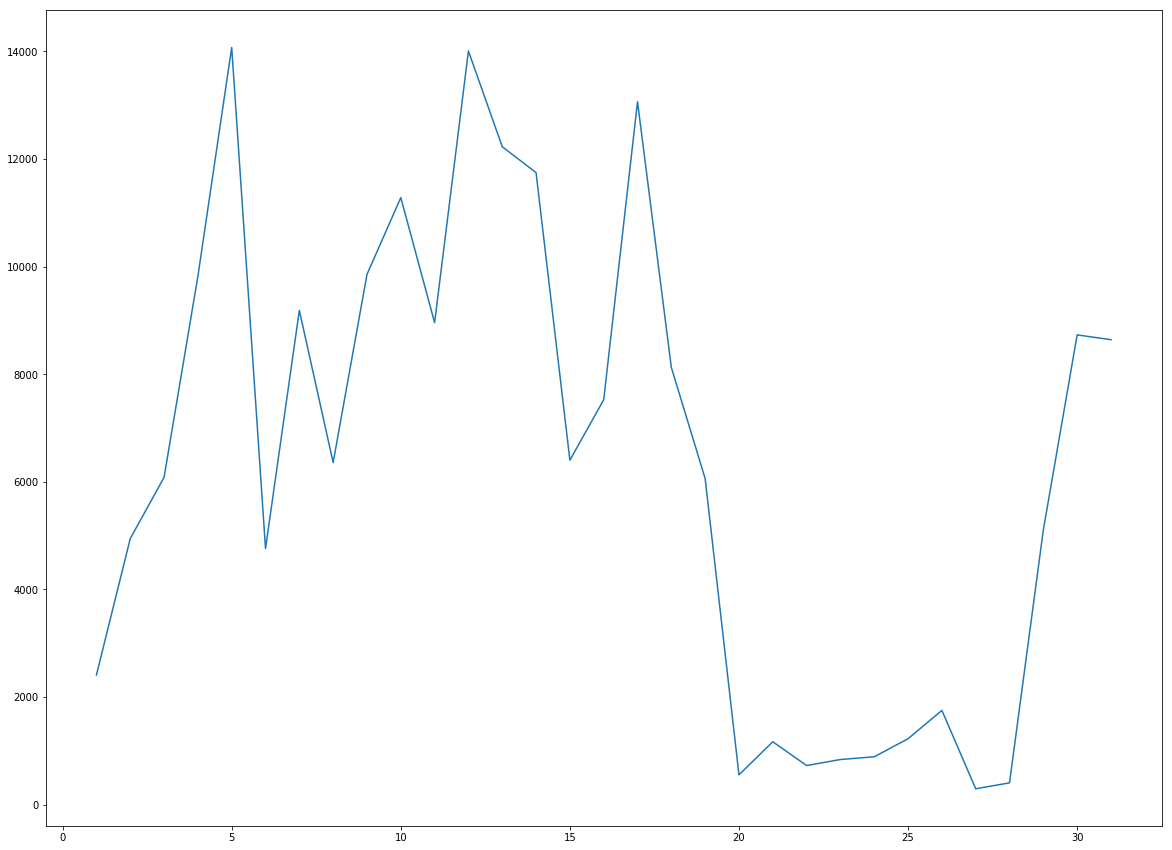

In [56]:
import matplotlib.pyplot as plt
new_df['Date'] = pd.to_datetime(new_df['Date'])
posting = new_df[['Date', 'Classification']]
posting = posting.dropna()

posting['Day'] = posting['Date'].dt.day
posting['Month'] = posting['Date'].dt.month

plt.figure(figsize=(20,15))
plt.plot(posting['Day'].value_counts().sort_index())

    - According to above graph, at the first half month, the number of posting is pretty high. Howevever, since the 20th day, the number of posting is decrease and only grow back at the end of the month.
    
### 3) Study the market by sectors.
    ○ Which sectors keep the highest market share? 

In [70]:
# Count the total cities of each sector available

sector = new_df[['Classification', 'Location']]
sector = sector.dropna()

table = pd.pivot_table(sector, columns=['Location'] ,index=['Classification'], aggfunc={'Location':'count'})
result = table.apply(lambda x: x.count(), axis=1)
result.sort_values(ascending = False)

Classification
Trades & Services                         65
Manufacturing, Transport & Logistics      65
Government & Defence                      65
Healthcare & Medical                      65
Farming, Animals & Conservation           64
Hospitality & Tourism                     64
Administration & Office Support           64
Community Services & Development          64
Engineering                               64
Retail & Consumer Products                64
Mining, Resources & Energy                63
Construction                              63
Education & Training                      63
Banking & Financial Services              62
Sales                                     60
Accounting                                60
Information & Communication Technology    55
Human Resources & Recruitment             54
Sport & Recreation                        53
Call Centre & Customer Service            52
Real Estate & Property                    52
CEO & General Management                

    - From above result, we can observe that "Trades & Services", "Manufacturing, Transport & Logistics", "Government & Defence" and "Healthcare & Medical" keep the highest market share with 65 cities for each.

    ○ What is the salary range for each sector/sub-sector? Can you compare salary range between sectors/subsectors? 

In [92]:
# Salary range for each sector
salary = df[['Classification', 'SubClassification', 'HighestSalary', 'LowestSalary']]
salary = salary.dropna()
salary['Range'] = salary['HighestSalary'] - salary['LowestSalary']

table_sector = pd.pivot_table(salary, columns=['Range'] ,index=['Classification'], aggfunc={'Range':'count'})

table_sector.describe().sum()

       Range
Range  10       24904.778533
       20        8870.122202
       30       14816.330920
       50        8117.274922
       799       4799.140218
dtype: float64

In [93]:
# Salary range for each sub-sector
table_sub = pd.pivot_table(salary, columns=['Range'] ,index=['SubClassification'], aggfunc={'Range':'count'})

table_sub.describe().sum()

       Range
Range  10       6556.046693
       20       2650.931782
       30       4121.107907
       50       1568.307015
       799      1205.844793
dtype: float64

In [ ]:
# Compare the salary range between sector and sub-sector

    ○ What is the trending of market i.e. if a high school student ask you which subject should he/she learn in the university (to guarantee a job in a future), what is your advice?

    ○ Can you detect which skills are required in each sector?

### 4) Visualize the results on an interactive web page.
    ○ Trend analysis: visualize number of jobs by locations, by sectors, etc. 

    ○ Compare between locations or sectors about the number of jobs, the salary, etc. 

    ○ Present the necessary skills by sectors, by subsectors. 

### 5) Using PySpark for your data analysis

# Part 3 - Evaluation
### 1) What are the findings of your data analytics? 

### 2) What actions for balancing the markets do you suggest based on your findings?

### 3) How could you refine your data analytics? 
    ○ Could you use different data sources?

    ○ Could you choose different parameters?

    ○ Could you choose other techniques? 

    ○ Can you think of ways to obtain more relevant data?

### 4) Are there any implications for employers and employees based on the findings you obtained? Justify your answer.